# **CUSTOMER SEGMENTATION ON E-COMMERCE**

In [ ]:
 pip install clusteval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.2 MB/s eta 0:00:00


In [ ]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing  import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
# Importing the data

data = pd.read_csv("/content/drive/MyDrive/pinnacle internship/e-commerce/E-commerce Customer Behavior - Sheet1.csv")

In [ ]:
data.shape     # shape of the data

(350, 11)

In [ ]:
data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


# **EXPLORATORY DATA ANALYSIS / DESCRIPTIVE STATISTICS**

In [ ]:
data.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


# **AUTO EDA**

In [ ]:
pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 50.5 MB/s eta 0:00:00


In [ ]:
import sweetviz

report = sweetviz.analyze([data,'data'])
report.show_html('My_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report My_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# **DATA PREPROCESSING**

In [ ]:
# Identify the null values

data.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0


In [ ]:
data['Satisfaction Level'] = data['Satisfaction Level'].fillna(data['Satisfaction Level'].mode()[0])            # Replace the null values

In [ ]:
# Check whether duplication presents or not

data.duplicated().sum()       # No duplications

0

,0
Customer ID,"Axes(0.125,0.11;0.110714x0.77)"
Age,"Axes(0.257857,0.11;0.110714x0.77)"
Total Spend,"Axes(0.390714,0.11;0.110714x0.77)"
Items Purchased,"Axes(0.523571,0.11;0.110714x0.77)"
Average Rating,"Axes(0.656429,0.11;0.110714x0.77)"
Days Since Last Purchase,"Axes(0.789286,0.11;0.110714x0.77)"


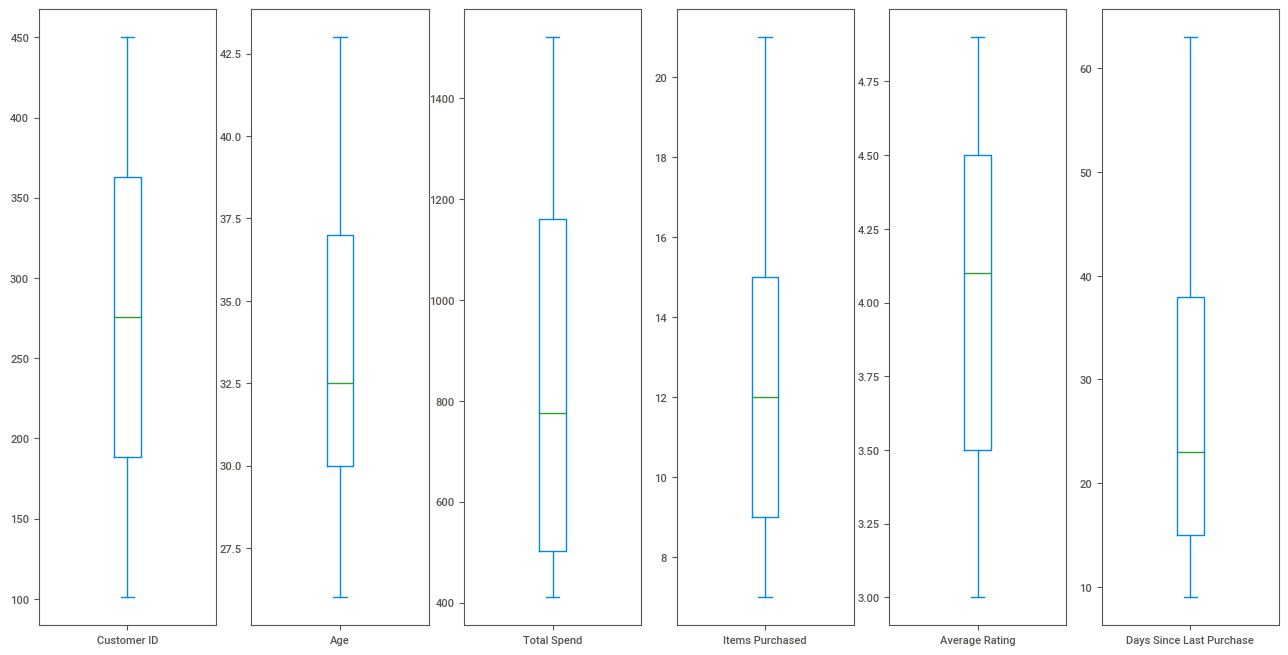

In [ ]:
# Checking if there is any outliers present or not

data.plot(kind = 'box', subplots = True, sharey = False, figsize = (16,8))

In [ ]:
# Separate the numerical and categorical columns in the dataset

numeric = data.select_dtypes(exclude = ['object']).columns
numeric

Index(['Customer ID', 'Age', 'Total Spend', 'Items Purchased',
       'Average Rating', 'Discount Applied', 'Days Since Last Purchase'],
      dtype='object')

In [ ]:
categorical = data.select_dtypes(include = ['object'])
categorical

,Gender,City,Membership Type,Satisfaction Level
0,Female,New York,Gold,Satisfied
1,Male,Los Angeles,Silver,Neutral
2,Female,Chicago,Bronze,Unsatisfied
3,Male,San Francisco,Gold,Satisfied
4,Male,Miami,Silver,Unsatisfied
...,...,...,...,...
345,Male,Miami,Silver,Unsatisfied
346,Female,Houston,Bronze,Neutral
347,Female,New York,Gold,Satisfied
348,Male,Los Angeles,Silver,Neutral


In [ ]:
# Encoding the categorical columns for better result

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
for column in categorical.columns:
  categorical[column +'encoder'] = le.fit_transform(categorical[column])

In [ ]:
categorical

,Gender,City,Membership Type,Satisfaction Level,Genderencoder,Cityencoder,Membership Typeencoder,Satisfaction Levelencoder
0,Female,New York,Gold,Satisfied,0,4,1,1
1,Male,Los Angeles,Silver,Neutral,1,2,2,0
2,Female,Chicago,Bronze,Unsatisfied,0,0,0,2
3,Male,San Francisco,Gold,Satisfied,1,5,1,1
4,Male,Miami,Silver,Unsatisfied,1,3,2,2
...,...,...,...,...,...,...,...,...
345,Male,Miami,Silver,Unsatisfied,1,3,2,2
346,Female,Houston,Bronze,Neutral,0,1,0,0
347,Female,New York,Gold,Satisfied,0,4,1,1
348,Male,Los Angeles,Silver,Neutral,1,2,2,0


In [ ]:
cate_1 = categorical.iloc[ : , 4: ]

In [ ]:
cate_1

,Genderencoder,Cityencoder,Membership Typeencoder,Satisfaction Levelencoder
0,0,4,1,1
1,1,2,2,0
2,0,0,0,2
3,1,5,1,1
4,1,3,2,2
...,...,...,...,...
345,1,3,2,2
346,0,1,0,0
347,0,4,1,1
348,1,2,2,0


In [ ]:
data_2 = pd.concat([data[numeric], cate_1], axis = 1)

In [ ]:
data_2

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Genderencoder,Cityencoder,Membership Typeencoder,Satisfaction Levelencoder
0,101,29,1120.20,14,4.6,True,25,0,4,1,1
1,102,34,780.50,11,4.1,False,18,1,2,2,0
2,103,43,510.75,9,3.4,True,42,0,0,0,2
3,104,30,1480.30,19,4.7,False,12,1,5,1,1
4,105,27,720.40,13,4.0,True,55,1,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...
345,446,32,660.30,10,3.8,True,42,1,3,2,2
346,447,36,470.50,8,3.0,False,27,0,1,0,0
347,448,30,1190.80,16,4.5,True,28,0,4,1,1
348,449,34,780.20,11,4.2,False,21,1,2,2,0


In [ ]:
data_2['Discount Applied'] = data_2['Discount Applied'].replace({True: 1 , False : 0})

In [ ]:
data_2

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Genderencoder,Cityencoder,Membership Typeencoder,Satisfaction Levelencoder
0,101,29,1120.20,14,4.6,1,25,0,4,1,1
1,102,34,780.50,11,4.1,0,18,1,2,2,0
2,103,43,510.75,9,3.4,1,42,0,0,0,2
3,104,30,1480.30,19,4.7,0,12,1,5,1,1
4,105,27,720.40,13,4.0,1,55,1,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...
345,446,32,660.30,10,3.8,1,42,1,3,2,2
346,447,36,470.50,8,3.0,0,27,0,1,0,0
347,448,30,1190.80,16,4.5,1,28,0,4,1,1
348,449,34,780.20,11,4.2,0,21,1,2,2,0


In [ ]:
combined = data_2.iloc[ : , 1: ]

In [ ]:
combined

,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Genderencoder,Cityencoder,Membership Typeencoder,Satisfaction Levelencoder
0,29,1120.20,14,4.6,1,25,0,4,1,1
1,34,780.50,11,4.1,0,18,1,2,2,0
2,43,510.75,9,3.4,1,42,0,0,0,2
3,30,1480.30,19,4.7,0,12,1,5,1,1
4,27,720.40,13,4.0,1,55,1,3,2,2
...,...,...,...,...,...,...,...,...,...,...
345,32,660.30,10,3.8,1,42,1,3,2,2
346,36,470.50,8,3.0,0,27,0,1,0,0
347,30,1190.80,16,4.5,1,28,0,4,1,1
348,34,780.20,11,4.2,0,21,1,2,2,0


In [ ]:
# Scaling the data (Standarad Scaler)

pipeline = Pipeline([
       ('scale', MinMaxScaler())
])

In [ ]:
process = pipeline.fit_transform(combined)

In [ ]:
process1 = pd.DataFrame(process, columns = combined.columns)

In [ ]:
process1

,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Genderencoder,Cityencoder,Membership Typeencoder,Satisfaction Levelencoder
0,0.176471,0.639502,0.500000,0.842105,1.0,0.296296,0.0,0.8,0.5,0.5
1,0.470588,0.333273,0.285714,0.578947,0.0,0.166667,1.0,0.4,1.0,0.0
2,1.000000,0.090102,0.142857,0.210526,1.0,0.611111,0.0,0.0,0.0,1.0
3,0.235294,0.964122,0.857143,0.894737,0.0,0.055556,1.0,1.0,0.5,0.5
4,0.058824,0.279095,0.428571,0.526316,1.0,0.851852,1.0,0.6,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
345,0.352941,0.224917,0.214286,0.421053,1.0,0.611111,1.0,0.6,1.0,1.0
346,0.588235,0.053818,0.071429,0.000000,0.0,0.333333,0.0,0.2,0.0,0.0
347,0.235294,0.703146,0.642857,0.789474,1.0,0.351852,0.0,0.8,0.5,0.5
348,0.470588,0.333003,0.285714,0.631579,0.0,0.222222,1.0,0.4,1.0,0.0


# **MODEL BUILDING**

# **HIERARCHICAL CLUSTERING (AGGLOMERATIVE APPROACH)**

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

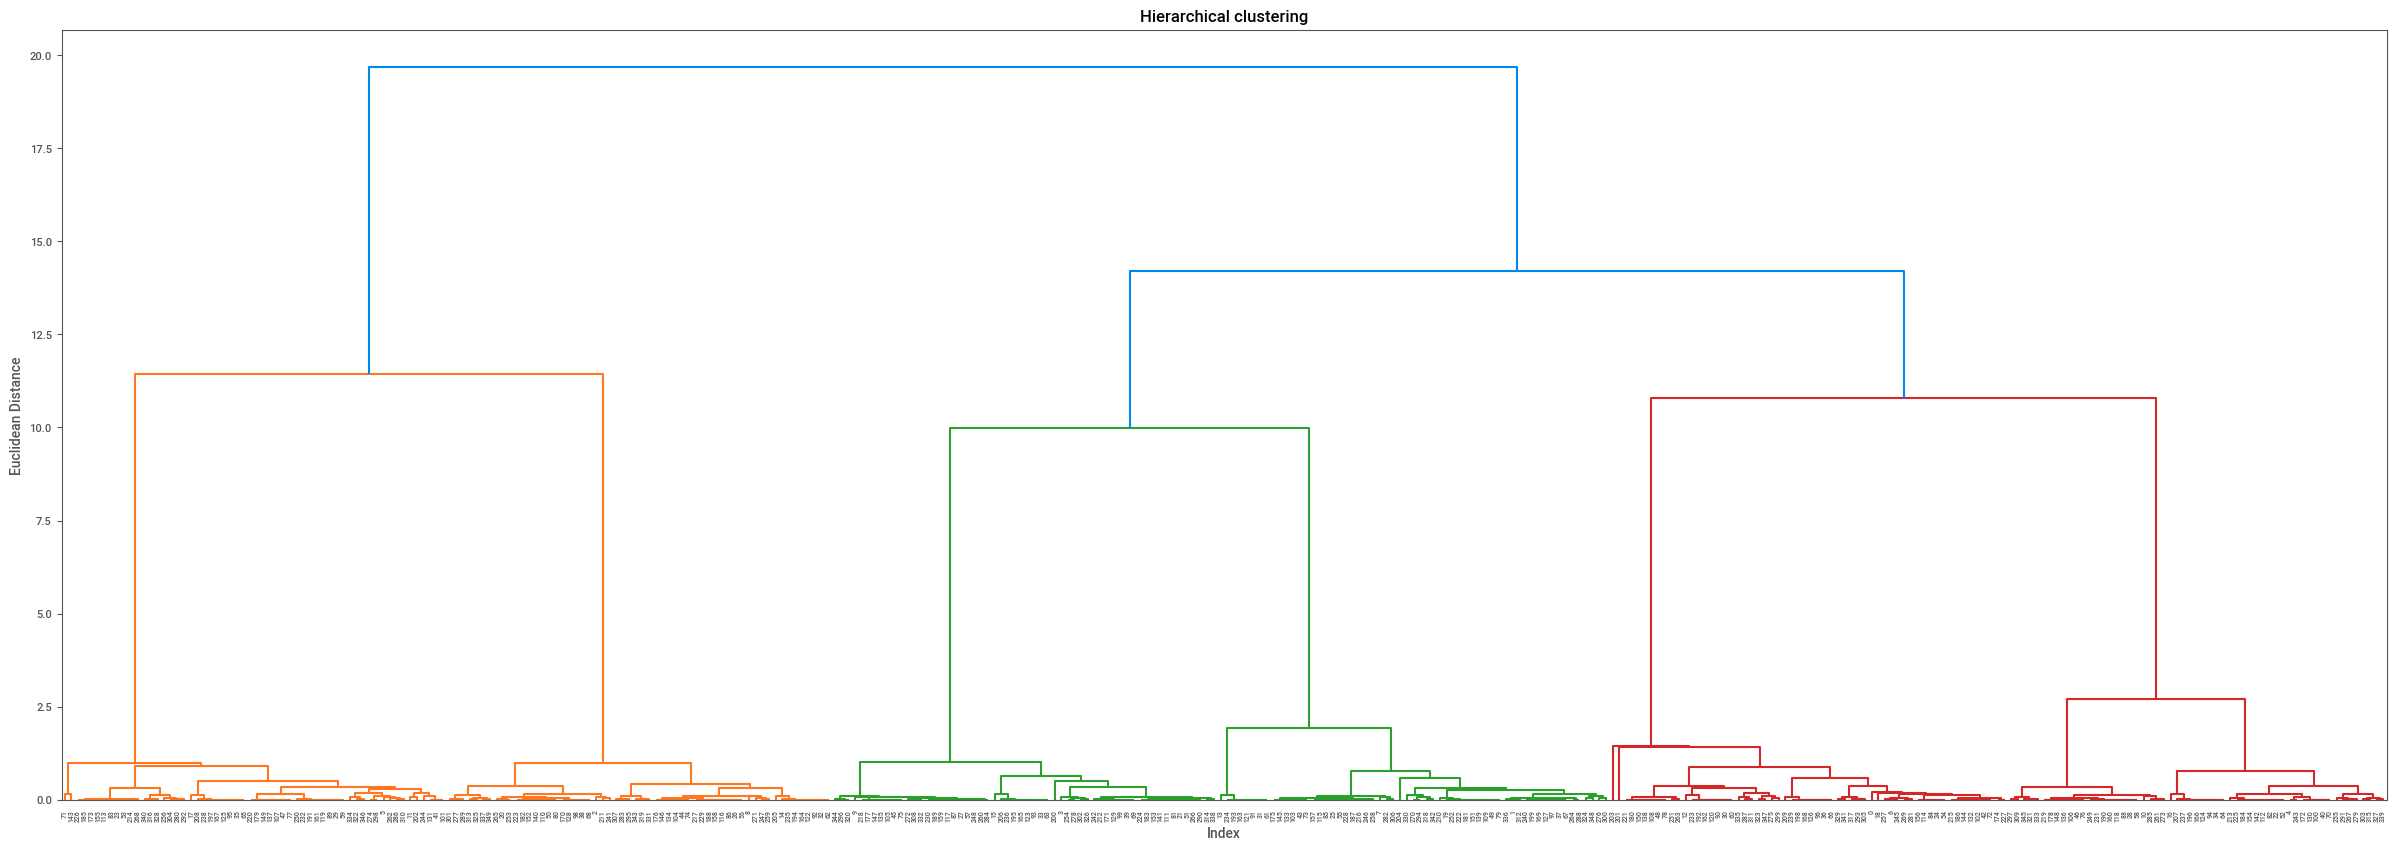

In [ ]:
plt.figure(1, figsize = (30,10))
tree_plot = dendrogram(linkage(process1, method = 'ward'))

plt.title('Hierarchical clustering')
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
hcl = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')

In [ ]:
y_hcl = hcl.fit_predict(process1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_hcl

array([0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2,
       0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1,
       0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2,
       0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1,
       0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2,
       0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1,
       0, 2, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0,
       1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3,
       2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0,
       2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0,
       1, 0, 2, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1, 0, 2,

In [ ]:
labels = pd.Series(y_hcl)

In [ ]:
final = pd.concat([labels, process1], axis = 1)

In [ ]:
final = final.rename(columns = {0 : 'Cluster'})

In [ ]:
final.head()

,Cluster,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Genderencoder,Cityencoder,Membership Typeencoder,Satisfaction Levelencoder
0,0,0.176471,0.639502,0.500000,0.842105,1.0,0.296296,0.0,0.8,0.5,0.5
1,2,0.470588,0.333273,0.285714,0.578947,0.0,0.166667,1.0,0.4,1.0,0.0
2,3,1.000000,0.090102,0.142857,0.210526,1.0,0.611111,0.0,0.0,0.0,1.0
3,2,0.235294,0.964122,0.857143,0.894737,0.0,0.055556,1.0,1.0,0.5,0.5
4,0,0.058824,0.279095,0.428571,0.526316,1.0,0.851852,1.0,0.6,1.0,1.0


# **CLUSTER EVALUATION**

In [ ]:
# **Silhouette coefficient:**
# Silhouette coefficient is a Metric, which is used for calculating
# goodness of the clustering technique, and the value ranges between (-1 to +1).
# It tells how similar an object is to its own cluster (cohesion) compared to
# other clusters (separation).
# A score of 1 denotes the best meaning that the data point is very compact
# within the cluster to which it belongs and far away from the other clusters.
# Values near 0 denote overlapping clusters."

In [ ]:
metrics.silhouette_score(process1, labels)

0.629717137731074

In [ ]:
# **Calinski Harabasz:**
# Higher value of the CH index means clusters are well separated.
# There is no thumb rule which is an acceptable cut-off value.

In [ ]:
metrics.calinski_harabasz_score(process1, labels)

344.3275250952335

In [ ]:
# **Davies-Bouldin Index:**
# Unlike the previous two metrics, this score measures the similarity of clusters.
# The lower the score the better the separation between your clusters.
# Vales can range from zero and infinity

In [ ]:
metrics.davies_bouldin_score(process1, labels)

0.7994479905287402

In [ ]:
from clusteval import clusteval

In [ ]:
ce = clusteval(evaluate = 'silhouette')

In [ ]:
data_array = np.array(process1)

In [ ]:
ce.fit(data_array)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 23/23 [00:00<00:00, 99.98it/s] 
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [7].
[clusteval] >INFO> Fin.


{'evaluate': 'silhouette',
 'score':     cluster_threshold  clusters     score
 0                   2         2  0.437365
 1                   3         3  0.514310
 2                   4         4  0.629717
 3                   5         5  0.738118
 4                   6         6  0.854526
 5                   7         7  0.856985
 6                   8         8  0.847694
 7                   9         9  0.840293
 8                  10        10  0.841324
 9                  11        11  0.799651
 10                 12        12  0.750708
 11                 13        13  0.722444
 12                 14        14  0.687878
 13                 15        15  0.622106
 14                 16        16  0.597737
 15                 17        17  0.593038
 16                 18        18  0.610818
 17                 19        19  0.615901
 18                 20        20  0.630789
 19                 21        21  0.632704
 20                 22        22  0.637189
 21               

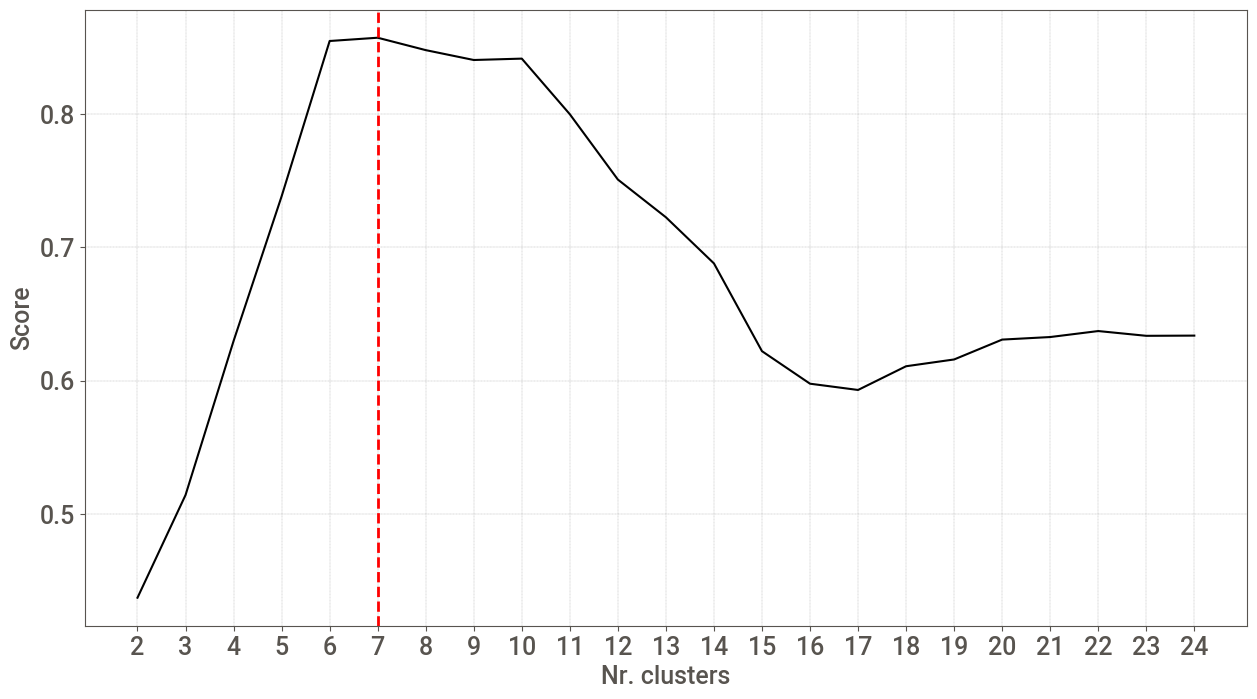

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [ ]:
ce.plot()

# **KMEANS CLUSTERING **

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
twss= []

In [ ]:
k = list(range(2,15))

In [ ]:
for i in k:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(process1)
  twss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [ ]:
twss

[286.5193871620929,
 185.78959715670047,
 120.54436513672215,
 62.342950320933404,
 12.557781341168116,
 8.858535538021899,
 6.9916518860948775,
 5.952665918721519,
 4.9588336929175325,
 4.5736288028091625,
 4.009409120081691,
 3.58079749568855,
 3.1923328757211458]

Text(0, 0.5, 'total within sum of square')

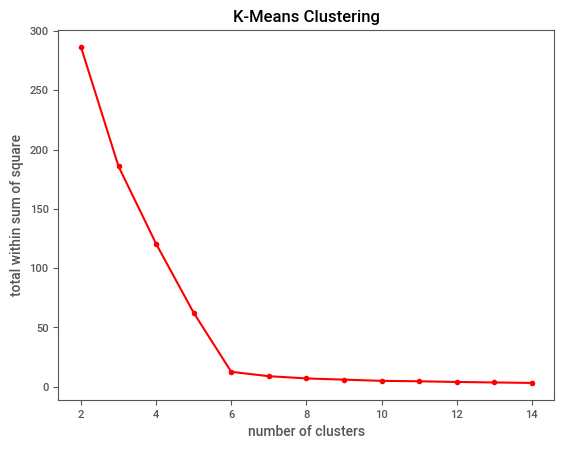

In [ ]:
plt.plot(k, twss, 'ro-')
plt.title('K-Means Clustering')
plt.xlabel('number of clusters')
plt.ylabel('total within sum of square')

In [ ]:
# Uing knee locator

list = []

for i in range(2,15):
  kmeans = KMeans(n_clusters = i, init = 'random', max_iter = 30, n_init = 10)
  kmeans.fit(process1)
  list.append(kmeans.inertia_)

In [ ]:
list

[286.5193871620929,
 185.78959715670047,
 127.58818234091194,
 62.342950320933404,
 12.557781341168116,
 10.690897689241083,
 11.12554260212878,
 5.952665918721519,
 4.9588336929175325,
 5.980647307704301,
 4.00906247263043,
 4.721542780057451,
 4.196456412612312]

In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator

<ipython-input-89-cd5aef197c38>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


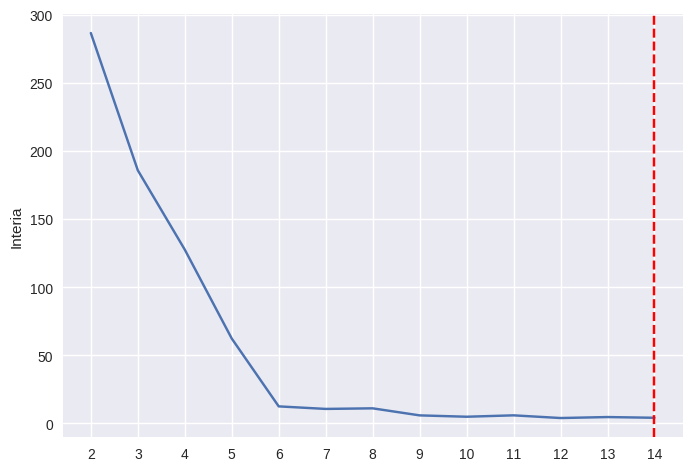

In [ ]:
kl = KneeLocator(range(2, 15), list, curve = 'convex')
kl.elbow
plt.style.use("seaborn")
plt.plot(range(2, 15), list)
plt.xticks(range(2, 15))
plt.ylabel("Interia")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show()

In [ ]:
model = KMeans(n_clusters = 6)

In [ ]:
k_model = model.fit(process1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
k_model

KMeans(n_clusters=6)

In [ ]:
model.labels_

array([2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4,
       5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1,
       0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3,
       2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4,
       5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1,
       0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3,
       2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4,
       5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1,
       0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3,
       2, 1, 4, 2, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5,
       3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0,
       4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2,
       1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5,
       3, 2, 1, 0, 4, 5, 3, 2, 1, 0, 4, 5, 3, 2, 1,

In [ ]:
metrics.silhouette_score(process1, model.labels_)

0.8545263947435553

In [ ]:
metrics.calinski_harabasz_score(process1, model.labels_)

2563.316545811345

In [ ]:
metrics.davies_bouldin_score(process1, model.labels_)

0.2463499594234091

In [ ]:
# Considering the both model, it shows number of clusters is 6, it is the better to divide based on that

# **Best Model**

In [ ]:
bestmodel =  KMeans(n_clusters = 6)

In [ ]:
result = bestmodel.fit(process1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
result.labels_

array([1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5,
       4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2,
       3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0,
       1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5,
       4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2,
       3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0,
       1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5,
       4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2,
       3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0,
       1, 2, 5, 1, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4,
       0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3,
       5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1,
       2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4,
       0, 1, 2, 3, 5, 4, 0, 1, 2, 3, 5, 4, 0, 1, 2,

In [ ]:
best_label = pd.Series(result.labels_)

In [ ]:
final_data = pd.concat([ best_label, data], axis = 1)       # concatenating the cluster and original data set before encoding

In [ ]:
final_data = final_data.rename(columns = {0 : 'Clusters'})

In [ ]:
final_data

,Clusters,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,1,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,2,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,3,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,5,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...
345,4,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,0,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,1,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,2,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [ ]:
final_data.to_csv(r"/content/drive/MyDrive/pinnacle internship/e-commerce/final_data_ecom.csv")